# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [2]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st


## Cargar datos

In [3]:
# Carga los archivos de datos en diferentes DataFrames
url_plans = 'https://raw.githubusercontent.com/Davichobacter/data_science_tt/refs/heads/main/Sprint_5_DATA/megaline_plans.csv'
plans_df = pd.read_csv(url_plans)

url_calls = 'https://raw.githubusercontent.com/Davichobacter/data_science_tt/refs/heads/main/Sprint_5_DATA/megaline_calls.csv'
calls_df = pd.read_csv(url_calls)

url_internet = 'https://raw.githubusercontent.com/Davichobacter/data_science_tt/refs/heads/main/Sprint_5_DATA/megaline_internet.csv'
internet_df = pd.read_csv(url_internet)

url_messages = 'https://raw.githubusercontent.com/Davichobacter/data_science_tt/refs/heads/main/Sprint_5_DATA/megaline_messages.csv'
messages_df = pd.read_csv(url_messages)

url_users = 'https://raw.githubusercontent.com/Davichobacter/data_science_tt/refs/heads/main/Sprint_5_DATA/megaline_users.csv'
users_df = pd.read_csv(url_users)

In [ ]:
# Carga los archivos de datos en diferentes DataFrames
calls_df = pd.read_csv('/datasets/megaline_calls.csv')

internet_df = pd.read_csv('/datasets/megaline_internet.csv')

messages_df = pd.read_csv('/datasets/megaline_messages.csv')

plans_df = pd.read_csv('/datasets/megaline_plans.csv')

users_df = pd.read_csv('/datasets/megaline_users.csv')

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [4]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [5]:
# Imprime una muestra de los datos para las tarifas

plans_df.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]


> El DataFrame `plans_df` contiene la información relativa a dos tarifas: Surf y Ultimate. Tiene 8 columnas con los siguientes tipos de datos:
> - `messages_included`: int64 (sin valores nulos) - Número de mensajes incluidos en la tarifa.
> - `mb_per_month_included`: int64 (sin valores nulos) - Megabytes de internet incluidos en la tarifa.
> - `minutes_included`: int64 (sin valores nulos) - Minutos de llamadas incluidos en la tarifa.
> - `usd_monthly_pay`: int64 (sin valores nulos) - Costo mensual de la tarifa en USD.
> - `usd_per_gb`: int64 (sin valores nulos) - Costo por GB adicional en USD.
> - `usd_per_message`: float64 (sin valores nulos) - Costo por mensaje adicional en USD.
> - `usd_per_minute`: float64 (sin valores nulos) - Costo por minuto adicional en USD.
> - `plan_name`: object (sin valores nulos) - Nombre de la tarifa (surf o ultimate).

> **Problemas y posibles soluciones:**
> - No se observan datos ausentes ni tipos de datos inadecuados en este DataFrame. Todos los datos están completos y con el tipo correcto. No se requieren correcciones adicionales en este DataFrame.

### Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

> No se observan datos ausentes ni tipos de datos inadecuados en este DataFrame. Todos los datos estan completos y con el tipo correcto. No se requieren correcciones adicionales en este DataFrame.

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [6]:
plans_df['gb_per_month_included'] = np.int64(plans_df['mb_per_month_included'] / 1024)
plans_df.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30


> Agregue la columna «GB por mes» para que coincida con la tarifa. Así, si después hay que hacer un cálculo con enteros, será más fácil.

## Usuarios/as

In [7]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
# Porcentaje de valores no nulos en la columna Churn_Date
users_df['churn_date'].notnull().sum() / users_df.shape[0] *100

np.float64(6.800000000000001)

In [9]:
# Imprime una muestra de datos para usuarios

users_df.sample(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
170,1170,Olin,Adkins,18,"Pittsburgh, PA MSA",2018-09-25,surf,NaN
50,1050,Jone,Owen,23,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-03-20,ultimate,2018-10-07
407,1407,Tristan,Daugherty,27,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-29,ultimate,NaN
130,1130,Clarence,Cunningham,27,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-05-17,surf,NaN
438,1438,Harvey,Brooks,36,"Orlando-Kissimmee-Sanford, FL MSA",2018-06-15,surf,NaN
276,1276,Karmen,Carney,20,"Phoenix-Mesa-Chandler, AZ MSA",2018-02-14,surf,NaN
380,1380,Lajuana,Kelley,35,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-09-04,ultimate,NaN
214,1214,Emil,Robles,34,"San Francisco-Oakland-Berkeley, CA MSA",2018-01-01,ultimate,NaN
367,1367,Minh,Fischer,18,"Baltimore-Columbia-Towson, MD MSA",2018-07-23,surf,NaN
325,1325,Cleora,Lyons,43,"Dallas-Fort Worth-Arlington, TX MSA",2018-06-26,surf,NaN


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

> El DataFrame contiene la información relativa a dos tarifas. Surf y Ultimate. Cada tarifa incluye información detallada sobre los datos incluidos, los megabytes de internet, los minutos de llamadas, el pago mensual, el costo por GB adicional, el costo por mensaje adicional y el costo por minuto adicional.

> El DataFrame `users_df` contiene información sobre los 500 clientes de Megaline. Tiene 8 columnas con los siguientes tipos de datos:
> - `user_id`: int64 (sin valores nulos) - Identificador único para cada usuario.
> - `first_name`: object (sin valores nulos) - Nombre del usuario.
> - `last_name`: object (sin valores nulos) - Apellido del usuario.
> - `age`: int64 (sin valores nulos) - Edad del usuario.
> - `city`: object (sin valores nulos) - Ciudad de residencia del usuario.
> - `reg_date`: object (sin valores nulos) - Fecha de registro del usuario.
> - `plan`: object (sin valores nulos) - Plan de suscripción del usuario (Surf o Ultimate).
> - `churn_date`: object (34 valores no nulos) - Fecha en que el usuario dejó de usar el servicio. La mayoría de los valores son nulos, lo que indica que la mayoría de los usuarios siguen activos.

> **Problemas y posibles soluciones:**
> - La columna `reg_date` y `churn_date` son de tipo `object`. Deberían ser convertidas a tipo datetime para facilitar el análisis temporal.
> - La columna `churn_date` tiene muchos valores ausentes (NaN). Esto es esperado, ya que representa la fecha en que un usuario dejó de usar el servicio, y la mayoría de los usuarios siguen activos. No es necesario imputar estos valores ausentes, ya que su ausencia tiene un significado (el usuario no ha dejado el servicio).

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [10]:
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'])
users_df['churn_date'] = pd.to_datetime(users_df['churn_date'])

In [11]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [12]:
users_df.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
445,1445,Elodia,Donovan,71,"Dallas-Fort Worth-Arlington, TX MSA",2018-01-27,ultimate,NaT
104,1104,Thurman,Stephens,20,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-12-23,ultimate,NaT
105,1105,Micheal,Poole,57,"Providence-Warwick, RI-MA MSA",2018-01-08,surf,NaT
252,1252,Mitsue,York,27,"Detroit-Warren-Dearborn, MI MSA",2018-06-10,surf,NaT
404,1404,Paulita,Conley,33,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-16,surf,NaT


> Corregí los tipos de datos de las columnas `reg_date` y `churn_date` del DataFrame `users_df`, convirtiéndolas de tipo `object` a `datetime`. Esto es importante para poder realizar análisis temporales con estas columnas, como extraer el mes o el año, o calcular duraciones. Los valores ausentes en `churn_date` se mantuvieron ya que representan a los usuarios activos.

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [14]:
users_df['reg_month'] = users_df['reg_date'].dt.month
users_df['reg_year'] = users_df['reg_date'].dt.year

In [15]:
users_df.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,reg_month,reg_year
176,1176,Terrance,Shaffer,75,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-10-03,surf,NaT,10,2018
443,1443,Genaro,Quinn,58,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-03-11,surf,NaT,3,2018
38,1038,Olympia,Velazquez,32,"Nashville-Davidson–Murfreesboro–Franklin, TN MSA",2018-06-25,ultimate,NaT,6,2018
327,1327,Natosha,Peck,20,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-17,surf,NaT,2,2018
241,1241,Lala,Walls,24,"Richmond, VA MSA",2018-08-27,surf,NaT,8,2018


> Agregué las columnas `reg_month` y `reg_year` extrayendo el mes y el año de la columna `reg_date`. Esto puede ser útil para analizar patrones de registro de usuarios a lo largo del tiempo.

## Llamadas

In [16]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [17]:
# Imprime una muestra de datos para las llamadas

calls_df.sample(10)

,id,user_id,call_date,duration
105680,1373_160,1373,2018-09-21,0.00
35179,1132_577,1132,2018-12-05,13.04
127355,1456_175,1456,2018-11-13,4.78
26860,1101_187,1101,2018-08-18,15.49
31906,1120_290,1120,2018-04-07,5.86
57952,1209_453,1209,2018-12-11,10.78
80546,1291_146,1291,2018-11-26,4.94
46021,1167_104,1167,2018-11-23,15.70
101263,1361_365,1361,2018-10-15,0.00
88167,1324_214,1324,2018-06-10,2.64


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

> El DataFrame `calls_df` contiene información sobre las llamadas individuales realizadas por los usuarios. Tiene 4 columnas con los siguientes tipos de datos:
> - `id`: object (sin valores nulos) - Identificador único para cada llamada.
> - `user_id`: int64 (sin valores nulos) - Identificador del usuario que realizó la llamada.
> - `call_date`: object (sin valores nulos) - Fecha en que se realizó la llamada.
> - `duration`: float64 (sin valores nulos) - Duración de la llamada en minutos.

> **Problemas y posibles soluciones:**
> - La columna `call_date` es de tipo `object`. Debería ser convertida a tipo datetime para facilitar el análisis temporal.
> - La columna `duration` tiene valores de 0.00. Esto podría representar llamadas perdidas o muy cortas. Dependiendo del objetivo del análisis, estos valores podrían ser considerados atípicos o simplemente reflejar el comportamiento real del usuario. Por ahora, no es necesario corregirlos, pero es algo a tener en cuenta para análisis posteriores.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [18]:
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'])

In [20]:
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


<Axes: xlabel='duration'>

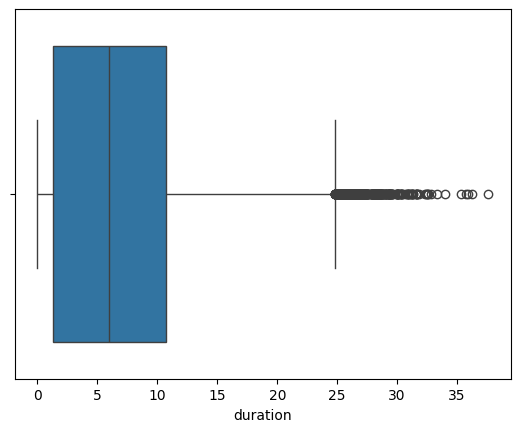

In [21]:
sns.boxplot(x=calls_df['duration'])

In [24]:
calls_df[calls_df['duration'] == 0].shape[0]

26834

> Corregí el tipo de dato de la columna `call_date` del DataFrame `calls_df`, convirtiéndola de tipo `object` a `datetime`. Esto es importante para poder realizar análisis temporales con esta columna. Yo decidí no realizar ninguna corrección en la columna `duration` a pesar de los valores 0.00, ya que estos pueden representar llamadas perdidas y considero que son parte del comportamiento real del usuario.

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [25]:
calls_df['month'] = calls_df['call_date'].dt.month

In [26]:
calls_df.sample(5)

,id,user_id,call_date,duration,month
66419,1240_277,1240,2018-08-19,20.47,8
127001,1453_63,1453,2018-11-16,10.49,11
121548,1427_216,1427,2018-09-19,10.64,9
26532,1100_89,1100,2018-10-03,2.92,10
137494,1498_431,1498,2018-08-02,2.82,8


> Agregué la columna `month` extrayendo el mes de la columna `call_date`. Esto me permitirá agrupar y analizar el comportamiento de los usuarios por mes.

## Mensajes

In [27]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [28]:
# Imprime una muestra de datos para los mensajes

messages_df.sample(10)

,id,user_id,message_date
60014,1381_127,1381,2018-11-01
39567,1257_120,1257,2018-11-02
14099,1098_96,1098,2018-09-16
42590,1280_79,1280,2018-09-13
57877,1365_33,1365,2018-10-08
22038,1132_1618,1132,2018-10-01
43553,1289_31,1289,2018-11-20
36205,1241_9,1241,2018-12-19
56816,1361_168,1361,2018-08-11
12719,1082_300,1082,2018-09-20


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

> El DataFrame `messages_df` contiene información sobre los mensajes individuales enviados por los usuarios. Tiene 3 columnas con los siguientes tipos de datos:
> - `id`: object (sin valores nulos) - Identificador único para cada mensaje.
> - `user_id`: int64 (sin valores nulos) - Identificador del usuario que envió el mensaje.
> - `message_date`: object (sin valores nulos) - Fecha en que se envió el mensaje.

> **Problemas y posibles soluciones:**
> - La columna `message_date` es de tipo `object`. Debería ser convertida a tipo datetime para facilitar el análisis temporal.
> - No se observan datos ausentes en este DataFrame.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [29]:
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'])

In [30]:
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [31]:
messages_df.sample(5)

,id,user_id,message_date
28309,1174_99,1174,2018-05-23
55977,1354_150,1354,2018-09-05
64561,1412_143,1412,2018-09-05
31894,1198_10,1198,2018-10-05
48868,1326_405,1326,2018-12-13


> Corregí el tipo de dato de la columna `message_date` del DataFrame `messages_df`, convirtiéndola de tipo `object` a `datetime`. Esto es importante para poder realizar análisis temporales con esta columna.

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [32]:
messages_df['month'] = messages_df['message_date'].dt.month

In [33]:
messages_df.sample(5)

,id,user_id,message_date,month
47762,1324_481,1324,2018-06-11,6
60049,1381_162,1381,2018-12-20,12
15386,1101_443,1101,2018-05-27,5
65617,1422_22,1422,2018-12-11,12
23915,1144_412,1144,2018-10-18,10


> Agregué la columna `month` extrayendo el mes de la columna `message_date`. Esto me permitirá agrupar y analizar el comportamiento de los usuarios por mes.

## Internet

In [34]:
# Imprime la información general/resumida sobre el DataFrame de internet

internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [35]:
# Imprime una muestra de datos para el tráfico de internet

internet_df.sample(10)

,id,user_id,session_date,mb_used
80749,1377_174,1377,2018-09-11,333.84
49344,1220_375,1220,2018-07-04,7.16
81968,1384_184,1384,2018-07-14,327.85
100804,1477_119,1477,2018-11-05,0.00
60457,1273_417,1273,2018-12-14,750.95
49227,1220_248,1220,2018-10-21,0.00
3075,1017_116,1017,2018-09-21,0.00
23633,1109_211,1109,2018-10-17,503.48
64953,1299_241,1299,2018-08-13,676.89
104503,1498_584,1498,2018-12-28,87.92


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

> El DataFrame `internet_df` contiene información sobre las sesiones individuales de internet de los usuarios. Tiene 4 columnas con los siguientes tipos de datos:
> - `id`: object (sin valores nulos) - Identificador único para cada sesión de internet.
> - `user_id`: int64 (sin valores nulos) - Identificador del usuario que realizó la sesión.
> - `session_date`: object (sin valores nulos) - Fecha en que se realizó la sesión.
> - `mb_used`: float64 (sin valores nulos) - Cantidad de megabytes usados en la sesión.

> **Problemas y posibles soluciones:**
> - La columna `session_date` es de tipo `object`. Debería ser convertida a tipo datetime para facilitar el análisis temporal.
> - La columna `mb_used` tiene valores de 0.00. Esto podría representar sesiones de internet muy cortas o conexiones fallidas. Al igual que con la duración de las llamadas, estos valores podrían ser considerados atípicos o simplemente reflejar el comportamiento real del usuario. Por ahora, no es necesario corregirlos, pero es algo a tener en cuenta para análisis posteriores.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [36]:
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'])

In [37]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [38]:
internet_df[internet_df['mb_used'] == 0].shape[0]

13747

> En esta sección, yo corregí el tipo de dato de la columna `session_date` del DataFrame `internet_df`, convirtiéndola de tipo `object` a `datetime`. Esto es importante para poder realizar análisis temporales con esta columna. Yo decidí no realizar ninguna corrección en la columna `mb_used` a pesar de los valores 0.00, ya que estos pueden representar sesiones de internet muy cortas o conexiones fallidas y considero que son parte del comportamiento real del usuario.

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [39]:
internet_df['month'] = internet_df['session_date'].dt.month

In [40]:
internet_df.sample(5)

,id,user_id,session_date,mb_used,month
53763,1243_65,1243,2018-12-06,76.73,12
12433,1060_142,1060,2018-09-11,1030.13,9
26343,1122_298,1122,2018-12-01,105.21,12
86640,1402_169,1402,2018-11-17,69.41,11
60891,1277_194,1277,2018-09-11,307.10,9


> Agregué la columna `month` extrayendo el mes de la columna `session_date`. Esto me permitirá agrupar y analizar el comportamiento de los usuarios por mes en cuanto al uso de internet.

# Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [41]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

plans_df

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [44]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
monthly_calls = calls_df.groupby(['user_id', 'month']).size().reset_index(name='calls_made')
monthly_calls.sample(10)

,user_id,month,calls_made
1817,1399,8,44
319,1068,12,39
465,1099,12,82
352,1075,11,22
1443,1321,10,63
829,1177,12,68
1705,1374,6,60
540,1117,5,11
228,1054,9,41
612,1132,11,83


In [45]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
monthly_minutes = calls_df.groupby(['user_id', 'month'])['duration'].sum().reset_index(name='minutes_used')
monthly_minutes.sample(10)

,user_id,month,minutes_used
945,1202,10,556.18
2243,1498,2,231.87
1031,1222,10,638.49
1268,1277,4,272.27
122,1033,11,875.61
1532,1338,10,611.13
2160,1476,9,396.67
1656,1363,11,245.75
971,1209,11,694.08
294,1065,9,197.73


In [46]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
monthly_messages = messages_df.groupby(['user_id', 'month']).size().reset_index(name='messages_sent')
monthly_messages.sample(10)

,user_id,month,messages_sent
437,1123,9,20
1061,1280,10,56
179,1059,8,65
1472,1394,12,23
1448,1386,11,12
751,1199,12,67
596,1161,12,2
917,1247,8,119
1569,1428,12,28
1742,1475,10,65


In [47]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
monthly_internet = internet_df.groupby(['user_id', 'month'])['mb_used'].sum().reset_index(name='mb_used_monthly')
monthly_internet.sample(10)

,user_id,month,mb_used_monthly
2256,1496,8,8605.66
743,1155,12,26530.44
1763,1382,8,12711.72
1113,1236,11,17141.73
1664,1361,5,1519.69
777,1162,11,17130.90
846,1176,11,28528.76
1493,1326,9,12098.38
1777,1384,12,22372.07
1805,1390,5,16499.79


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [49]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
monthly_data = monthly_calls.merge(monthly_minutes, on=['user_id', 'month'], how='outer')
monthly_data = monthly_data.merge(monthly_messages, on=['user_id', 'month'], how='outer')
monthly_data = monthly_data.merge(monthly_internet, on=['user_id', 'month'], how='outer')

monthly_data.sample(10)

,user_id,month,calls_made,minutes_used,messages_sent,mb_used_monthly
1693,1364,9,65.0,418.93,22.0,14818.32
1669,1361,6,51.0,385.88,42.0,14532.00
517,1110,5,13.0,65.07,12.0,7247.61
1771,1382,12,170.0,1222.37,52.0,10969.81
2063,1445,3,36.0,218.79,9.0,5096.67
2170,1470,12,78.0,560.44,153.0,NaN
516,1109,12,66.0,441.27,NaN,12497.47
1034,1215,12,129.0,1108.45,98.0,34298.28
2235,1489,10,66.0,492.70,84.0,14695.08
1398,1302,11,70.0,449.45,68.0,22987.59


In [50]:
# Añade la información de la tarifa
monthly_data = monthly_data.merge(users_df[['user_id', 'plan']], on='user_id', how='left')

monthly_data.sample(10)

,user_id,month,calls_made,minutes_used,messages_sent,mb_used_monthly,plan
886,1185,5,79.0,449.36,NaN,20954.25,ultimate
1724,1369,12,58.0,366.02,112.0,36721.64,surf
123,1033,11,112.0,875.61,37.0,27039.35,ultimate
223,1053,12,47.0,290.93,12.0,15720.48,surf
632,1133,7,10.0,58.04,27.0,3895.05,ultimate
1227,1259,4,13.0,85.25,27.0,3519.44,surf
896,1187,5,92.0,591.08,8.0,21073.09,surf
2183,1474,11,42.0,242.96,30.0,18222.36,surf
378,1079,10,108.0,693.16,71.0,17375.90,surf
2114,1459,11,70.0,440.11,NaN,21549.01,ultimate


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [ ]:
# Calcula el ingreso mensual para cada usuario



In [51]:
# Rellenar los valores ausentes con 0 ya que representan el no uso de un servicio
monthly_data = monthly_data.fillna(0)

In [54]:
plans_df.rename(columns={'plan_name': 'plan'}, inplace=True)

In [56]:
# Fusionar con la información de los planes
monthly_data = monthly_data.merge(plans_df, on='plan', how='left')

In [ ]:
# Calcular el ingreso mensual para cada usuario
def calculate_revenue(row):
    plan_name = row['plan']
    minutes_used = row['minutes_used']
    messages_sent = row['messages_sent']
    mb_used_monthly = row['mb_used_monthly']

    # Obtener límites y costos del plan
    plan_info = plans_df[plans_df['plan_name'] == plan_name].iloc[0]
    minutes_included = plan_info['minutes_included']
    messages_included = plan_info['messages_included']
    mb_included = plan_info['mb_per_month_included']
    usd_monthly_pay = plan_info['usd_monthly_pay']
    usd_per_minute = plan_info['usd_per_minute']
    usd_per_message = plan_info['usd_per_message']
    usd_per_gb = plan_info['usd_per_gb']

    # Calcular exceso de uso y costos adicionales
    minutes_over = max(0, minutes_used - minutes_included)
    messages_over = max(0, messages_sent - messages_included)
    mb_over = max(0, mb_used_monthly - mb_included)

    # Convertir MB a GB para el cálculo de costo adicional de internet
    gb_over = np.ceil(mb_over / 1024)

    # Calcular ingresos adicionales
    overage_revenue = (minutes_over * usd_per_minute) + \
                      (messages_over * usd_per_message) + \
                      (gb_over * usd_per_gb)

    # Calcular ingreso total mensual
    total_revenue = usd_monthly_pay + overage_revenue

    return total_revenue

monthly_data['monthly_revenue'] = monthly_data.apply(calculate_revenue, axis=1)

display(monthly_data.head())

> Calculé el ingreso mensual para cada usuario. Para ello, primero rellené los valores ausentes con 0 en el DataFrame `monthly_data`, ya que la ausencia de datos en este caso significa que el usuario no utilizó ese servicio en particular durante ese mes. Luego, fusioné este DataFrame con el DataFrame `plans_df` para tener acceso a la información de los límites y costos de cada plan. Finalmente, definí una función `calculate_revenue` que toma la información de cada fila del DataFrame `monthly_data` y calcula el ingreso restando el consumo incluido en el plan de su consumo total, multiplicando el exceso por el costo adicional correspondiente, y sumando la tarifa mensual base. El exceso de megabytes se redondeó hacia arriba para calcular el costo adicional por gigabyte, como es la práctica común.

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

In [ ]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.



In [ ]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.



[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [ ]:
# Calcula la media y la varianza de la duración mensual de llamadas.



In [ ]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas



[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

### Mensajes

In [ ]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan



In [ ]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan



[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

### Internet

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [ ]:
# Prueba las hipótesis



[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [ ]:
# Prueba las hipótesis



## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]